In [10]:
import librosa
from glob import glob
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [11]:
df_full_path_list = []
df_file_name_list = []
df_lbl_list=[]
for file_full_path in glob(r"C:\\Users\\MalindaPieris\\Desktop\\dataset\\*.wav"):
    #df_temp = pd.read_csv(file_name, sep="\t")
    file_name =os.path.basename(file_full_path)
    df_file_name_list.append(os.path.basename(file_full_path))
    df_full_path_list.append(file_full_path)

    if(file_name.startswith('S')):
        df_lbl_list.append(0)
    elif(file_name.startswith('H')):
        df_lbl_list.append(1)
    else:
         df_lbl_list.append(2)

    #librosa_audio_data,librosa_sample_rate=librosa.load(file_name)

    # Original audio with 1 channel 
    #plt.figure(figsize=(12, 4))
    #plt.plot(librosa_audio_data)
    #print(file_name)
    #print('librosa_audio_data:',librosa_audio_data,'\n')
    #print('Sample Rate (KHz):',librosa_sample_rate, '\n')
    #print('Length of Audio:', len(librosa_audio_data)/librosa_sample_rate)
#df = pd.concat(df_list, axis=0, ignore_index=True)
#del df_list

In [12]:
###add to pandas df
train_data = pd.DataFrame({'full_path': df_full_path_list, 'file_name': df_file_name_list, 'label': df_lbl_list})
#df = df.reset_index
train_data

,full_path,file_name,label
0,C:\\Users\\MalindaPieris\\Desktop\\dataset\C01...,C01.wav,2
1,C:\\Users\\MalindaPieris\\Desktop\\dataset\C02...,C02.wav,2
2,C:\\Users\\MalindaPieris\\Desktop\\dataset\C03...,C03.wav,2
3,C:\\Users\\MalindaPieris\\Desktop\\dataset\C04...,C04.wav,2
4,C:\\Users\\MalindaPieris\\Desktop\\dataset\C05...,C05.wav,2
...,...,...,...
157,C:\\Users\\MalindaPieris\\Desktop\\dataset\S48...,S48.wav,0
158,C:\\Users\\MalindaPieris\\Desktop\\dataset\S49...,S49.wav,0
159,C:\\Users\\MalindaPieris\\Desktop\\dataset\S50...,S50.wav,0
160,C:\\Users\\MalindaPieris\\Desktop\\dataset\S51...,S51.wav,0


In [4]:
### Zero Crossing Rate

In [15]:
x,sr = librosa.load(r'C:\Users\MalindaPieris\Desktop\\dataset\C04.wav')

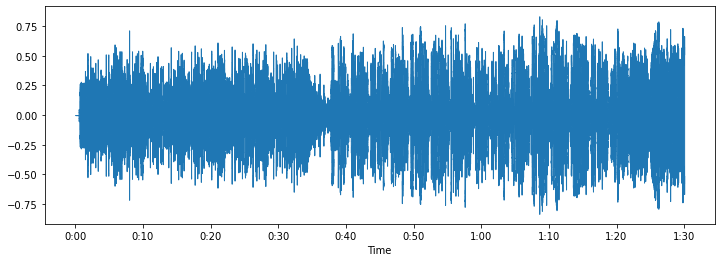

In [16]:
import librosa.display
plt.figure(figsize=(12, 4))
librosa.display.waveshow(x, sr=sr)


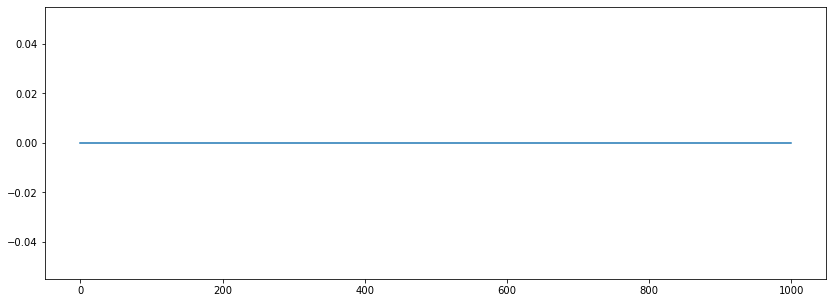

In [17]:
n0 = 6500
n1 = 7500
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])

In [18]:
zero_crossings = librosa.zero_crossings(x, pad=False)
zero_crossings.shape

(1984618,)

In [19]:
print(sum(zero_crossings))

181528


In [20]:
####RMS

In [21]:
S,phase = librosa.magphase(librosa.stft(x))
rms = librosa.feature.rms(S=S)
rms_mean = np.mean(rms)
rms_var = np.var(rms)

In [22]:
### Spectral Centroid

In [23]:
centroid = librosa.feature.spectral_centroid(S=S)
centroid_mean = np.mean(centroid)
centroid_var = np.var(centroid)

In [24]:
### bandwidth

In [25]:
bandwidth = librosa.feature.spectral_bandwidth(S=S)
bandwidth_mean = np.mean(bandwidth)
bandwidth_var = np.var(bandwidth)

In [26]:
bandwidth_var

81133.08148239057

In [29]:
import numpy as np 
y,sr = librosa.load('datasetfinal\C04.wav')
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
np.mean(beats)

1953.8193277310925

In [30]:
librosa.key_to_notes(key='C:maj')

['C', 'C♯', 'D', 'D♯', 'E', 'F', 'F♯', 'G', 'G♯', 'A', 'A♯', 'B']

In [31]:
pitches = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']

key = librosa.feature.chroma_stft(y=y,sr=sr).sum(axis=1).argmax()

print(pitches[key])

if librosa.feature.chroma_stft(y=y,sr=sr).sum(axis=1)[(key+3)%12] > librosa.feature.chroma_stft(y=y,sr=sr).sum(axis=1)[(key+4)%12]:
     print('minor')
else:
    print('Major')

C
minor


In [32]:
def feature_extract(row):
    filepath = row['full_path']
    ls_mean = []
    ls_var =[]
    
    try:
        y,sr = librosa.load(filepath,res_type='kaiser_fast')
        
        length = len(y)/sr
        mean_stft = np.mean(librosa.feature.chroma_stft(y=y,sr=sr))
        var_stft = np.var(librosa.feature.chroma_stft(y=y,sr=sr))
        tempo = librosa.beat.tempo(y,sr=sr)[0]
        
        S,phase = librosa.magphase(librosa.stft(y))
        rms = librosa.feature.rms(S=S)
        rms_mean = np.mean(rms)
        rms_var = np.var(rms)
        
        centroid = librosa.feature.spectral_centroid(S=S)
        centroid_mean = np.mean(centroid)
        centroid_var = np.var(centroid)
        
        bandwidth = librosa.feature.spectral_bandwidth(S=S)
        bandwidth_mean = np.mean(bandwidth)
        bandwidth_var = np.var(bandwidth)
        
        rolloff = librosa.feature.spectral_rolloff(y=y,sr=sr,roll_percent=0.85)
        rolloff_mean = np.mean(rolloff)
        rolloff_var = np.var(rolloff)
        
        zerocrossing = librosa.feature.zero_crossing_rate(y=y)
        crossing_mean = np.mean(zerocrossing)
        crossing_var = np.var(zerocrossing)
        
        y_harmonic = librosa.effects.harmonic(y=y)
        harmonic_mean = np.mean(y_harmonic)
        harmonic_var = np.var(y_harmonic)
        
        contrast = librosa.feature.spectral_contrast(S=S,sr=sr)
        contrast_mean = np.mean(contrast)
        contrast_var = np.var(contrast)

        mfcc= librosa.feature.mfcc(y=y,sr=sr)
        for i in range(0,20):
            ls_mean.append(np.mean(mfcc[i]))
            ls_var.append(np.var(mfcc[i]))
            
        key = librosa.feature.chroma_stft(y=y,sr=sr).sum(axis=1).argmax()
        key_name = pitches[librosa.feature.chroma_stft(y=y,sr=sr).sum(axis=1).argmax()]
        
        if librosa.feature.chroma_stft(y=y,sr=sr).sum(axis=1)[(key+3)%12] > librosa.feature.chroma_stft(y=y,sr=sr).sum(axis=1)[(key+4)%12]:
             scale = 'minor'
        else:
             scale = 'Major'
        
    except:
        length = 0
        mean_stft =0
        var_stft = 0
        tempo=0
        rms_mean =0 
        rms_var= 0
        centroid_mean=0
        centroid_var=0
        bandwidth_mean =0
        bandwidth_var=0
        rolloff_mean = 0
        rolloff_var = 0
        crossing_mean = 0
        crossing_var = 0
        harmonic_mean=0
        harmonic_var =0
        contrast_mean = 0
        contrast_var =0
        key = 0
        key_name=0
        scale =0
        
        for i in range(0,20):
            ls_mean.append(0) 
            ls_var.append(0)
        
    return [length,mean_stft,var_stft,tempo,rms_mean,rms_var,centroid_mean,centroid_var,\
bandwidth_mean,bandwidth_var,rolloff_mean,rolloff_var, crossing_mean,crossing_var,\
harmonic_mean,harmonic_var,contrast_mean,contrast_var,key,key_name,scale,ls_mean[0],ls_var[0],ls_mean[1],ls_var[1],ls_mean[2],ls_var[2],\
ls_mean[3],ls_var[3],ls_mean[4],ls_var[4],ls_mean[5],ls_var[5],ls_mean[6],ls_var[6],ls_mean[7],ls_var[7],ls_mean[8],ls_var[8],\
ls_mean[9],ls_var[9],ls_mean[10],ls_var[10],ls_mean[11],ls_var[11],ls_mean[12],ls_var[12],ls_mean[13],ls_var[13],ls_mean[14],ls_var[14],\
ls_mean[15],ls_var[15],ls_mean[16],ls_var[16],ls_mean[17],ls_var[17],ls_mean[18],ls_var[18],ls_mean[19],ls_var[19]]

In [33]:
%%time 

train_data[['length','mean_stft','var_stft','tempo','rms_mean','rms_var','centroid_mean','centroid_var',\
'bandwidth_mean','bandwidth_var','rolloff_mean','rolloff_var', 'crossing_mean','crossing_var',\
'harmonic_mean','harmonic_var','contrast_mean','contrast_var','key','key_name','scale','mfcc1_mean','mfcc1_var','mfcc2_mean','mfcc2_var','mfcc3_mean','mfcc3_var','mfcc4_mean','mfcc4_var',\
        'mfcc5_mean','mfcc5_var','mfcc6_mean','mfcc6_var','mfcc7_mean','mfcc7_var','mfcc8_mean','mfcc8_var',\
        'mfcc9_mean','mfcc9_var','mfcc10_mean','mfcc10_var','mfcc11_mean','mfcc11_var','mfcc12_mean','mfcc12_var',\
        'mfcc13_mean','mfcc13_var','mfcc14_mean','mfcc14_var','mfcc15_mean','mfcc15_var','mfcc16_mean','mfcc16_var',\
        'mfcc17_mean','mfcc17_var','mfcc18_mean','mfcc18_var','mfcc19_mean','mfcc19_var','mfcc20_mean','mfcc20_var']] = train_data.apply(feature_extract,axis=1,result_type='expand')

C:\Users\MALIND~1\AppData\Local\Temp/ipykernel_16356/3074886051.py:12: FutureWarning: Pass y=[-0.00028019  0.00069253  0.000393   ... -0.00422876  0.05815329
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(y,sr=sr)[0]
C:\Users\MALIND~1\AppData\Local\Temp/ipykernel_16356/3074886051.py:12: FutureWarning: Pass y=[-0.00388637 -0.00590602 -0.00516941 ...  0.03598983  0.03185099
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(y,sr=sr)[0]
C:\Users\MALIND~1\AppData\Local\Temp/ipykernel_16356/3074886051.py:12: FutureWarning: Pass y=[0.03957213 0.06022616 0.04874782 ... 0.09991743 0.19039041 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(y,sr=sr)[0]
C:\Users\MALIND~1\AppData\Local\Temp/ipykernel_16356/3074886051.py:12: Future

C:\Users\MALIND~1\AppData\Local\Temp/ipykernel_16356/3074886051.py:12: FutureWarning: Pass y=[ 1.4297357e-05  1.9234924e-04  7.4690639e-04 ... -1.6993439e-03
 -1.5845120e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(y,sr=sr)[0]
C:\Users\MALIND~1\AppData\Local\Temp/ipykernel_16356/3074886051.py:12: FutureWarning: Pass y=[0.00264541 0.00245733 0.00180899 ... 0.10164374 0.12370301 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(y,sr=sr)[0]
C:\Users\MALIND~1\AppData\Local\Temp/ipykernel_16356/3074886051.py:12: FutureWarning: Pass y=[-2.4345542e-04  6.0346545e-05  1.4957624e-03 ...  1.5221094e-01
  2.3533517e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(y,sr=sr)[0]
C:\Users\MALIND~1\AppData\Local\Temp/ipyk

C:\Users\MALIND~1\AppData\Local\Temp/ipykernel_16356/3074886051.py:12: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.18738127 -0.19204585
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(y,sr=sr)[0]
C:\Users\MALIND~1\AppData\Local\Temp/ipykernel_16356/3074886051.py:12: FutureWarning: Pass y=[0.00239885 0.00257024 0.00254825 ... 0.38374785 0.45129997 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(y,sr=sr)[0]
C:\Users\MALIND~1\AppData\Local\Temp/ipykernel_16356/3074886051.py:12: FutureWarning: Pass y=[-4.3108908e-04 -1.1049202e-04  5.9912250e-05 ... -1.4694150e-01
 -1.6874032e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(y,sr=sr)[0]
C:\Users\MALIND~1\AppData\Local\Temp/ipykernel_16356/307488

C:\Users\MALIND~1\AppData\Local\Temp/ipykernel_16356/3074886051.py:12: FutureWarning: Pass y=[ 0.00341409  0.00277186  0.00389083 ... -0.07325683 -0.05342478
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(y,sr=sr)[0]
C:\Users\MALIND~1\AppData\Local\Temp/ipykernel_16356/3074886051.py:12: FutureWarning: Pass y=[-0.00079018 -0.00081387 -0.00048574 ... -0.00978825 -0.00697527
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(y,sr=sr)[0]
C:\Users\MALIND~1\AppData\Local\Temp/ipykernel_16356/3074886051.py:12: FutureWarning: Pass y=[-0.05117257 -0.04679368  0.00625413 ... -0.1059764  -0.21116287
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(y,sr=sr)[0]
C:\Users\MALIND~1\AppData\Local\Temp/ipykernel_16356/3074886051.py:12:

C:\Users\MALIND~1\AppData\Local\Temp/ipykernel_16356/3074886051.py:12: FutureWarning: Pass y=[0.         0.         0.         ... 0.23400678 0.29915318 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(y,sr=sr)[0]
C:\Users\MALIND~1\AppData\Local\Temp/ipykernel_16356/3074886051.py:12: FutureWarning: Pass y=[0.         0.         0.         ... 0.11619461 0.04563027 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(y,sr=sr)[0]
C:\Users\MALIND~1\AppData\Local\Temp/ipykernel_16356/3074886051.py:12: FutureWarning: Pass y=[0.         0.         0.         ... 0.08358616 0.08100048 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(y,sr=sr)[0]
C:\Users\MALIND~1\AppData\Local\Temp/ipykernel_16356/3074886051.py:12: FutureWarning: Pass 

C:\Users\MALIND~1\AppData\Local\Temp/ipykernel_16356/3074886051.py:12: FutureWarning: Pass y=[0.00228048 0.00348888 0.00318602 ... 0.02272105 0.05351047 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(y,sr=sr)[0]
C:\Users\MALIND~1\AppData\Local\Temp/ipykernel_16356/3074886051.py:12: FutureWarning: Pass y=[-0.00960184 -0.01494638 -0.01344757 ...  0.01622237  0.03077068
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(y,sr=sr)[0]
C:\Users\MALIND~1\AppData\Local\Temp/ipykernel_16356/3074886051.py:12: FutureWarning: Pass y=[-0.00134387 -0.00073534  0.00583629 ...  0.1403922   0.20312539
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(y,sr=sr)[0]
C:\Users\MALIND~1\AppData\Local\Temp/ipykernel_16356/3074886051.py:12: Future

Wall time: 20min 21s


In [34]:
train_data

,full_path,file_name,label,length,mean_stft,var_stft,tempo,rms_mean,rms_var,centroid_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,C:\\Users\\MalindaPieris\\Desktop\\dataset\C01...,C01.wav,2,89.964898,0.275224,0.093021,161.499023,0.081367,0.001215,1673.697293,...,5.186113,73.224716,-9.724364,80.946159,5.438193,80.185890,-5.477156,112.206451,0.053528,71.645546
1,C:\\Users\\MalindaPieris\\Desktop\\dataset\C02...,C02.wav,2,90.005351,0.250740,0.090683,112.347147,0.082627,0.001422,1765.695879,...,4.754404,86.876045,-5.145290,98.027069,-3.866246,98.045235,-4.877863,107.574478,-0.232096,128.440887
2,C:\\Users\\MalindaPieris\\Desktop\\dataset\C03...,C03.wav,2,90.005351,0.286669,0.093691,112.347147,0.114716,0.001681,2187.203904,...,8.641453,104.689796,-4.955923,108.652824,5.016712,90.776955,-8.201651,78.629532,-5.519436,63.807980
3,C:\\Users\\MalindaPieris\\Desktop\\dataset\C04...,C04.wav,2,90.005351,0.337223,0.090180,161.499023,0.064972,0.000719,2005.874692,...,1.316931,44.678360,-4.801381,62.484035,1.990833,50.326237,-6.999200,47.119698,-6.218065,52.381439
4,C:\\Users\\MalindaPieris\\Desktop\\dataset\C05...,C05.wav,2,90.005351,0.305165,0.088748,161.499023,0.104558,0.001169,1663.893188,...,5.619913,80.377174,-4.650899,64.220078,1.648852,73.429375,-3.788304,77.242744,0.503928,78.398102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,C:\\Users\\MalindaPieris\\Desktop\\dataset\S48...,S48.wav,0,90.005351,0.275751,0.094162,95.703125,0.038308,0.000301,1984.300334,...,-0.271072,115.835159,-6.292717,127.256027,-2.429276,123.303314,-3.373862,117.743134,1.005969,115.201523
158,C:\\Users\\MalindaPieris\\Desktop\\dataset\S49...,S49.wav,0,90.005351,0.284617,0.095113,161.499023,0.110475,0.003106,2109.760652,...,2.504320,85.672478,-7.461490,92.505463,6.916681,86.310158,-5.771663,119.156563,-2.863569,108.390465
159,C:\\Users\\MalindaPieris\\Desktop\\dataset\S50...,S50.wav,0,90.005351,0.216250,0.088328,151.999081,0.095680,0.001188,1242.548400,...,2.032096,211.282990,-3.523564,126.113312,-0.612478,89.496323,-12.000331,110.569511,-3.477236,97.075218
160,C:\\Users\\MalindaPieris\\Desktop\\dataset\S51...,S51.wav,0,90.005351,0.284599,0.087368,117.453835,0.097182,0.000753,2029.793007,...,1.601205,68.697617,-11.123910,138.588959,2.209245,116.667580,-8.190091,124.273178,-0.272624,136.738510


In [35]:
train_data.to_csv("train_data.csv", encoding='utf-8', index=False)